In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random


In [2]:
# import data from file
road = pd.read_csv('data/demo_1234.csv')

In [3]:
road.head()

,road,id,model_type,name,lat,lon,length,condition,road_lrp,nearest_road,distance_to_nearest_road
0,N1,N102_0,intersection,Km post missing,23.478972,91.118097,0.0,NaN,N1LRP084,N102_0,0.019837
1,N1,N105_0,intersection,NAYABARI BOX CULVERT,23.690664,90.546037,0.0,B,N1LRP011c,N105_0,0.129263
2,N1,3,sourcesink,Start of Road after Jatrabari Flyover infront...,23.706028,90.443333,0.0,NaN,N1LRPS,NaN,NaN
3,N1,4,link,Km post missing,23.702139,90.451972,1.0,NaN,N1LRP001,NaN,NaN
4,N1,5,link,Km post missing,23.702056,90.515722,1.0,NaN,N1LRP008,NaN,NaN


In [9]:
def find_shortest_path_from_sourcesink(df):
    """
    Finds and visualizes the shortest path between two randomly selected 'sourcesink' nodes in a given road network.
 
    """
    # Create a directed graph
    G = nx.Graph()

    # Add nodes: Each road segment (lat, lon) becomes a node
    for _, row in df.iterrows():
        G.add_node(row['id'], pos=(row['lon'], row['lat']), model_type=row['model_type'])

    # Add edges based on road connectivity
    for i in range(len(df) - 1):
        if df.loc[i, 'road'] == df.loc[i + 1, 'road']:  # Ensure edges are within the same road
            G.add_edge(df.loc[i, 'id'], df.loc[i + 1, 'id'], weight=df.loc[i, 'length'])

    # Extract node positions for visualization
    pos = nx.get_node_attributes(G, 'pos')

    # Filter for nodes where 'model_type' is 'sourcesink'
    sourcesink_nodes = df[df['model_type'] == 'sourcesink']['id'].tolist()

    # Randomly select two distinct sourcesink nodes
    if len(sourcesink_nodes) >= 2:
        source, sink = random.sample(sourcesink_nodes, 2)  # Pick two distinct nodes
    else:
        print("Not enough 'sourcesink' nodes available for shortest path calculation.")
        return

    # Compute the shortest path using road length as weight
    shortest_path = nx.shortest_path(G, source, sink, weight='weight')

    # Draw the full network
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=False, node_color='orange', edge_color='gray', node_size=5, font_size=8)

    # Highlight the shortest path
    path_edges = list(zip(shortest_path, shortest_path[1:]))  # Convert path nodes into edges
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    # Show edge labels (road segment lengths)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

    # Display the graph
    plt.title(f"Shortest Path from {source} to {sink}")
    plt.show()

    # Print the shortest path
    print(f"Shortest path from {source} to {sink}: {shortest_path}")




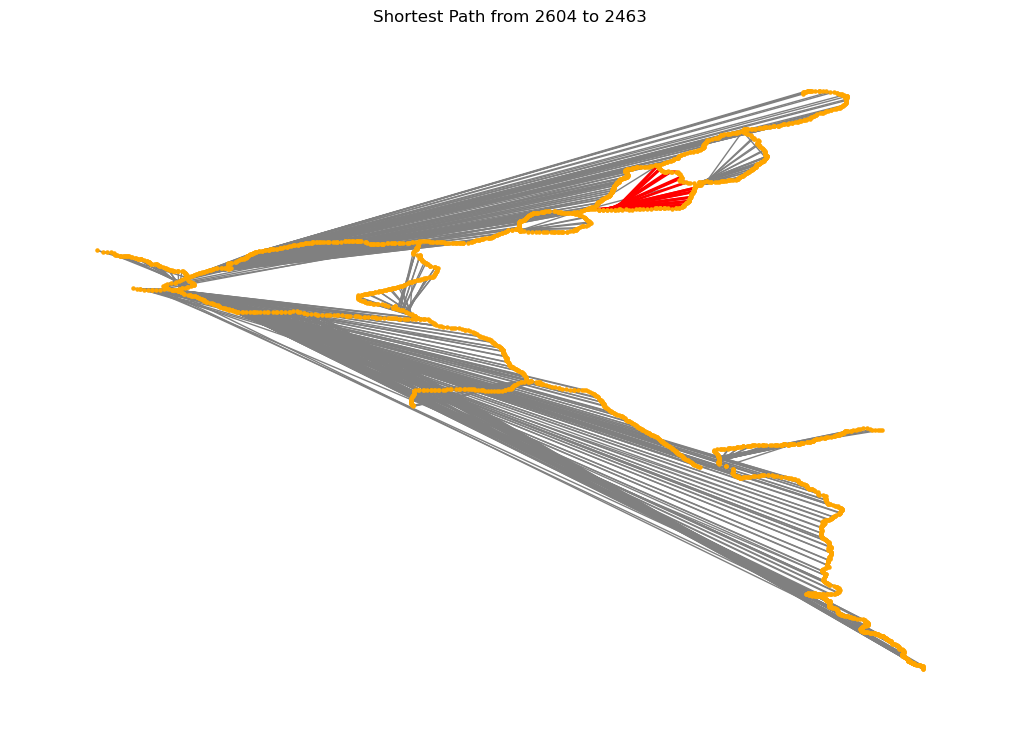

Shortest path from 2604 to 2463: ['2604', 'N207_94', '2593', '2592', '2591', '2590', '2589', '2588', '2587', '2586', '2585', '2584', '2583', '2582', '2581', '2580', '2579', '2578', '2577', '2576', '2575', '2574', '2573', '2572', '2571', '2570', '2569', '2568', '2567', '2566', '2565', '2564', '2563', '2562', '2561', '2560', '2559', '2558', '2557', '2556', '2555', '2554', '2553', '2552', '2551', '2550', '2549', '2548', '2547', '2546', '2545', '2544', '2543', '2542', '2541', '2540', '2539', '2538', '2537', '2536', '2535', '2534', '2533', '2532', '2531', '2530', '2529', '2528', '2527', '2526', '2525', '2524', '2523', '2522', '2521', '2520', '2519', '2518', '2517', '2516', '2515', '2514', '2513', '2512', '2511', '2510', '2509', '2508', '2507', '2506', '2505', '2504', '2503', '2502', '2501', '2500', '2499', '2498', '2497', '2496', '2495', '2494', '2493', '2492', '2491', '2490', '2489', '2488', '2487', '2486', '2485', '2484', '2483', '2482', '2481', '2480', '2479', '2478', '2477', '2476', '24

In [10]:
find_shortest_path_from_sourcesink(road)